In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn import preprocessing
from imblearn.datasets import make_imbalance
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image 
from sklearn import inspection
import mlxtend
from mlxtend.evaluate import feature_importance_permutation
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_auc_score
from mlens.visualization import corrmat
from joblib import dump, load

[MLENS] backend: threading


In [2]:
df = pd.read_csv(r'D:\0_sea_ice_challenge\processing\DRIFT_DATA_TRAIN.csv')
print(df.columns)
df_training = df[:]

Index(['year', 'month', 'day', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'id_buoy', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_cs2smos', 'h_piomas',
       'd2c'],
      dtype='object')


In [3]:
var=df.copy()
var.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334


In [33]:
var.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,vel_mag
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298,1.370671
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669,0.741408
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379,1.187695
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629,0.920127
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334,1.300527


In [4]:
var.shape

(339478, 15)

In [102]:
var.dtypes

year           int64
month          int64
day            int64
doy            int64
x_EASE       float64
y_EASE       float64
u_buoy       float64
v_buoy       float64
id_buoy        int64
u_ERA5       float64
v_ERA5       float64
sic_CDR      float64
h_cs2smos    float64
h_piomas     float64
d2c          float64
vel_mag      float64
dtype: object

In [30]:
var.describe()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,vel mag
count,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,72768.000000,339478.000000,339478.000000,339478.000000
mean,2007.013774,6.749374,15.744955,190.020314,163.595093,156.507375,-0.333029,1.359709,35576.107397,-0.096208,0.335691,0.955278,1.774036,2.069873,418.132032,8.353460
std,9.822726,3.454148,8.752622,105.562830,24.451743,34.697790,8.072700,7.860918,31444.526635,4.319904,4.124477,0.124625,0.800483,0.922070,259.827915,7.690366
min,1979.000000,1.000000,1.000000,1.000000,39.168983,36.870293,-74.682899,-66.781601,0.000000,-23.084634,-20.146717,0.000027,0.016601,0.000000,0.359009,0.000000
25%,2000.000000,4.000000,8.000000,101.000000,146.809723,129.208836,-3.722860,-2.325024,7408.000000,-3.149262,-2.617482,0.976706,1.215125,1.478507,210.220330,2.888761
50%,2009.000000,7.000000,16.000000,190.000000,161.223709,152.350731,-0.024725,0.322306,26150.000000,-0.165074,0.289388,1.000000,1.733047,2.041238,389.570385,6.664808
75%,2015.000000,10.000000,23.000000,285.000000,181.115864,179.608978,2.942216,4.969131,64878.000000,2.934149,3.204041,1.000000,2.284967,2.619901,599.120875,11.674104
max,2019.000000,12.000000,31.000000,364.000000,279.391541,279.562073,68.396103,68.639801,99800.000000,17.911558,22.862028,1.000000,4.930797,6.284669,1120.364872,75.609704


In [58]:
range1 = list(np.arange(0,1,.1)) + list(np.arange(.91,.99,.01)) + list(np.arange(.99,1.0001,.001))
p = var.vel_mag.quantile(range1)

In [63]:
df1 = pd.DataFrame(p)
df1.head()

,vel_mag
0.0,0.000000
0.1,0.502663
0.2,2.107899
0.3,3.635868
0.4,5.110577


In [86]:
a=[]
for i in df1.iterrows():
    percentile_value = i[1]['vel_mag']
    size = var[var['vel_mag']<=percentile_value].shape[0]
    a.append(size)

In [88]:
b=[0]+a
del b[-1]

In [96]:
print(len(b))
print(b)

29
[0, 9107, 33948, 67896, 101844, 135791, 169739, 203687, 237634, 271582, 305530, 308925, 312319, 315714, 319109, 322504, 325898, 329293, 332688, 336083, 336422, 336762, 337101, 337441, 337780, 338120, 338459, 338799, 339138]


In [97]:
print(len(a))
print(a)

29
[9107, 33948, 67896, 101844, 135791, 169739, 203687, 237634, 271582, 305530, 308925, 312319, 315714, 319109, 322504, 325898, 329293, 332688, 336083, 336422, 336762, 337101, 337441, 337780, 338120, 338459, 338799, 339138, 339478]


In [98]:
c = np.array(a) - np.array(b)
print(c)

[ 9107 24841 33948 33948 33947 33948 33948 33947 33948 33948  3395  3394
  3395  3395  3395  3394  3395  3395  3395   339   340   339   340   339
   340   339   340   339   340]


In [100]:
df1['count'] = c

In [101]:
df1


,vel_mag,count
0.000,0.000000,9107
0.100,0.502663,24841
0.200,2.107899,33948
0.300,3.635868,33948
0.400,5.110577,33947
0.500,6.664808,33948
0.600,8.389287,33948
0.700,10.438174,33947
0.800,13.150692,33948
0.900,17.647298,33948


In [104]:
var['type'] = var.vel_mag.map(lambda x: 0 if x == 0 else 2 if x > 30 else 1)

In [106]:
print(var['type'].value_counts())

1    324027
0      9107
2      6344
Name: type, dtype: int64


In [107]:
#create dummy variables for multiclass predictor
cov_dummy = pd.get_dummies(var['type'])
cov_dummy.head()
cov_dummy.shape

(339478, 3)

In [108]:
df2 = pd.concat([cov_dummy, var], axis = 1)
print(df2.shape)
df2.head()

(339478, 20)


,0,1,2,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,vel_mag,type
0,0,1,0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298,1.370671,1
1,0,1,0,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669,0.741408,1
2,0,1,0,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379,1.187695,1
3,0,1,0,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629,0.920127,1
4,0,1,0,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334,1.300527,1


In [109]:
df2_column_names = list(df2.columns)
df2_column_names.remove('type')
df2_column_names

[0,
 1,
 2,
 'year',
 'month',
 'day',
 'doy',
 'x_EASE',
 'y_EASE',
 'u_buoy',
 'v_buoy',
 'id_buoy',
 'u_ERA5',
 'v_ERA5',
 'sic_CDR',
 'h_cs2smos',
 'h_piomas',
 'd2c',
 'vel_mag']

In [112]:
# Normalize all columns

x = df2.loc[:, df2.columns != 'type'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data=x_scaled, columns=df2_column_names)
#df_normalized.loc[:,:] = x_scaled

In [113]:
print(df_normalized.shape)
print(df2.shape)

(339478, 19)
(339478, 20)


In [114]:
df_normalized

,0,1,2,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,vel_mag
0,0.0,1.0,0.0,0.0,0.090909,0.566667,0.132231,0.450990,0.419101,0.516395,0.501371,0.019098,0.399561,0.460963,0.990195,NaN,0.507543,0.466216,0.018128
1,0.0,1.0,0.0,0.0,0.090909,0.566667,0.132231,0.448192,0.344633,0.526465,0.495862,0.019168,0.396769,0.452757,0.966371,NaN,0.395249,0.368220,0.009806
2,0.0,1.0,0.0,0.0,0.090909,0.566667,0.132231,0.382248,0.382186,0.513845,0.494939,0.019178,0.347817,0.494566,0.996022,NaN,0.393673,0.323381,0.015708
3,0.0,1.0,0.0,0.0,0.090909,0.566667,0.132231,0.451064,0.496565,0.528398,0.493330,0.019218,0.536749,0.444359,0.982681,NaN,0.595182,0.339879,0.012169
4,0.0,1.0,0.0,0.0,0.090909,0.600000,0.134986,0.450840,0.419172,0.524632,0.502322,0.019098,0.510181,0.527439,0.990301,NaN,0.507349,0.465334,0.017201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339473,0.0,1.0,0.0,1.0,1.000000,0.966667,1.000000,0.641335,0.559853,0.515112,0.406754,0.449699,0.501463,0.328627,1.000000,0.284390,0.257773,0.626741,0.155264
339474,0.0,1.0,0.0,1.0,1.000000,0.966667,1.000000,0.704564,0.433388,0.471313,0.454077,0.531112,0.450518,0.459557,1.000000,0.208248,0.205095,0.321545,0.118676
339475,0.0,1.0,0.0,1.0,1.000000,0.966667,1.000000,0.441653,0.450116,0.515583,0.509253,0.952104,0.610437,0.494453,1.000000,0.415758,0.311926,0.351284,0.031289
339476,0.0,1.0,0.0,1.0,1.000000,0.966667,1.000000,0.644204,0.566721,0.521261,0.406065,0.077655,0.502881,0.343724,1.000000,0.283805,0.256321,0.606871,0.155961


In [116]:
RANDOM_STATE = 7

In [117]:
#append Y axis babck to this 
df_normalized_w_target = pd.concat([df_normalized, df2['type']], axis=1)
df_normalized_w_target.tail()

,0,1,2,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,vel_mag,type
339473,0.0,1.0,0.0,1.0,1.0,0.966667,1.0,0.641335,0.559853,0.515112,0.406754,0.449699,0.501463,0.328627,1.000000,0.284390,0.257773,0.626741,0.155264,1
339474,0.0,1.0,0.0,1.0,1.0,0.966667,1.0,0.704564,0.433388,0.471313,0.454077,0.531112,0.450518,0.459557,1.000000,0.208248,0.205095,0.321545,0.118676,1
339475,0.0,1.0,0.0,1.0,1.0,0.966667,1.0,0.441653,0.450116,0.515583,0.509253,0.952104,0.610437,0.494453,1.000000,0.415758,0.311926,0.351284,0.031289,1
339476,0.0,1.0,0.0,1.0,1.0,0.966667,1.0,0.644204,0.566721,0.521261,0.406065,0.077655,0.502881,0.343724,1.000000,0.283805,0.256321,0.606871,0.155961,1
339477,1.0,0.0,0.0,1.0,1.0,0.966667,1.0,0.254926,0.506398,0.521970,0.493139,0.164940,0.596570,0.638411,0.949973,0.245152,0.213090,0.010146,0.000000,0


In [156]:
# set target data  and x values
X=df_normalized_w_target[list(df_normalized_w_target.columns)[3:-1]]
print(X.shape)
X.head()

(339478, 16)


,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,vel_mag
0,0.0,0.090909,0.566667,0.132231,0.450990,0.419101,0.516395,0.501371,0.019098,0.399561,0.460963,0.990195,NaN,0.507543,0.466216,0.018128
1,0.0,0.090909,0.566667,0.132231,0.448192,0.344633,0.526465,0.495862,0.019168,0.396769,0.452757,0.966371,NaN,0.395249,0.368220,0.009806
2,0.0,0.090909,0.566667,0.132231,0.382248,0.382186,0.513845,0.494939,0.019178,0.347817,0.494566,0.996022,NaN,0.393673,0.323381,0.015708
3,0.0,0.090909,0.566667,0.132231,0.451064,0.496565,0.528398,0.493330,0.019218,0.536749,0.444359,0.982681,NaN,0.595182,0.339879,0.012169
4,0.0,0.090909,0.600000,0.134986,0.450840,0.419172,0.524632,0.502322,0.019098,0.510181,0.527439,0.990301,NaN,0.507349,0.465334,0.017201


In [157]:
X.shape

(339478, 16)

In [158]:
X = X.drop('h_cs2smos',axis=1)

In [159]:
X.shape

(339478, 15)

In [160]:
X.columns

Index(['year', 'month', 'day', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'id_buoy', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_piomas', 'd2c', 'vel_mag'],
      dtype='object')

In [161]:
Y=df_normalized_w_target[list(df_normalized_w_target.columns)[-1]]
print(Y.shape)
Y.head()
#Y

(339478,)


0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

In [162]:
print(X.shape)
print(Y.shape)

(339478, 15)
(339478,)


In [163]:
#sample the data, 6300 per output
X, y = make_imbalance(X, Y,
                      sampling_strategy={0: 6300, 1: 6300, 2: 6300},
                      random_state=RANDOM_STATE)

In [164]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [165]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({2: 4736, 0: 4733, 1: 4706})
Testing target statistics: Counter({1: 1594, 0: 1567, 2: 1564})


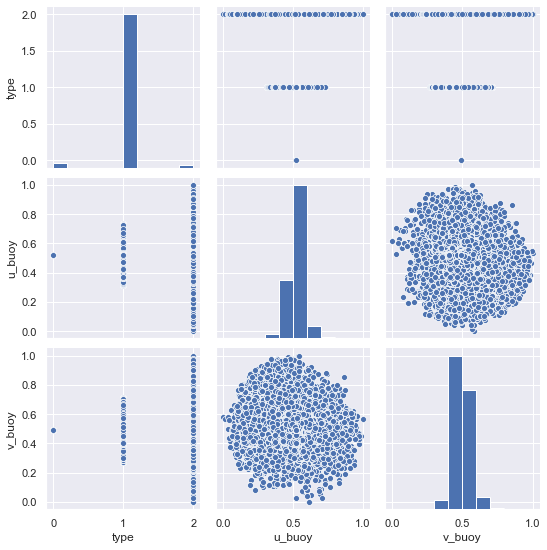

In [166]:
sns.set()
cols2 = ['type', 'u_buoy', 'v_buoy']
sns.pairplot(df_normalized_w_target[cols2], height = 2.5)
plt.show();

In [167]:
clf = DecisionTreeClassifier(random_state=7)

In [168]:
clf = clf.fit(X_train, y_train)

In [169]:
dtree = DecisionTreeClassifier( random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [170]:
predictions = dtree.predict(X_test)

In [171]:
#this is for all the variables
print ("Decision Tree Train Accuracy:", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print ("Decision Tree Test Accuracy:", metrics.accuracy_score(y_test, dtree.predict(X_test)))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.9997883597883598


In [172]:
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 1.00


In [174]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1567
           1       1.00      1.00      1.00      1594
           2       1.00      1.00      1.00      1564

    accuracy                           1.00      4725
   macro avg       1.00      1.00      1.00      4725
weighted avg       1.00      1.00      1.00      4725



In [175]:
X_test

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,vel_mag
13723,0.975,0.545455,1.000000,0.581267,0.355724,0.345311,0.358083,0.226277,0.080361,0.456045,0.557172,0.368048,0.007866,0.179982,0.569764
1447,0.975,0.272727,0.833333,0.316804,0.451577,0.279876,0.521970,0.493139,0.593287,0.653004,0.490526,0.912566,0.304140,0.019065,0.000000
5549,0.925,0.272727,0.433333,0.286501,0.060356,0.884145,0.521970,0.493139,0.350802,0.635162,0.563926,0.902541,0.064609,0.017593,0.000000
1634,0.825,0.090909,0.166667,0.099174,0.493009,0.660416,0.521970,0.493139,0.351202,0.525871,0.482520,1.000000,0.518133,0.120501,0.000000
10294,0.750,0.909091,0.033333,0.840220,0.475315,0.560302,0.426636,0.371624,0.902034,0.260969,0.341108,1.000000,0.412755,0.261642,0.282689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,0.750,0.727273,0.566667,0.716253,0.516762,0.436589,0.558240,0.445321,0.000080,0.644354,0.337804,0.926559,0.151387,0.755721,0.109755
15978,0.600,0.181818,0.733333,0.223140,0.572504,0.804095,0.261993,0.737595,0.255501,0.312330,0.615297,0.399837,0.419262,0.263419,0.658579
4371,0.975,0.454545,0.233333,0.435262,0.451577,0.279876,0.521970,0.493139,0.796894,0.659491,0.371407,0.949803,0.271083,0.019065,0.000000
17824,0.475,0.818182,0.733333,0.812672,0.462857,0.910038,0.413166,0.833541,0.196182,0.526653,0.888647,0.954984,0.073908,0.009697,0.643508


In [176]:
print(confusion_matrix(y_test,predictions))

[[1567    0    0]
 [   1 1593    0]
 [   0    0 1564]]


Text(0, 0.5, 'Accuracy Rate')

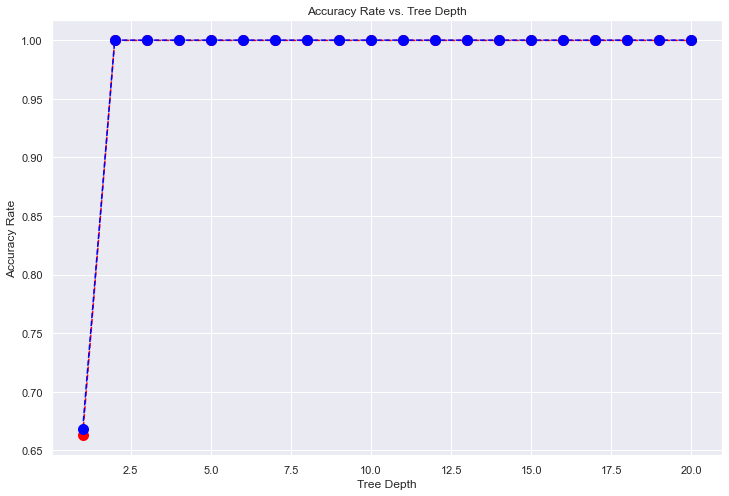

In [177]:
accuracy_rate = []
training_acc = []

for i in range(1,21):   
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, y_train) 
    accuracy_rate.append(dtree.score(X_test, y_test))
    training_acc.append(dtree.score(X_train, y_train))


plt.figure(figsize=(12,8))

plt.plot(np.arange(1,21), accuracy_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(np.arange(1,21), training_acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Rate')

#blue - trianing accuracy 
# red - testing accuracyy